In [1]:
import pandas as pd

# Load datasets
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
gender_submission = pd.read_csv('gender_submission.csv')

# Preview structure
print("Train shape:", train.shape)
print("Test shape:", test.shape)
print("Gender submission shape:", gender_submission.shape)

train.head()

Train shape: (891, 12)
Test shape: (418, 11)
Gender submission shape: (418, 2)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Load Titanic datasets for EDA and modeling.
# 'train.csv' contains labeled data for survival analysis.
# 'test.csv' is used for prediction and lacks survival labels.
# 'gender_submission.csv' provides a baseline prediction based on gender.

In [2]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

# Drop 'Cabin' due to excessive missing values, which limits analytical utility.
# Fill missing 'Age' with median to preserve central tendency without skewing distribution.
# Fill missing 'Embarked' with mode to retain categorical integrity.

In [3]:
# Drop 'Cabin' due to excessive missing values
train.drop(columns='Cabin', inplace=True)

# Fill missing 'Age' with median
train['Age'].fillna(train['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)

C:\Users\rhipa\AppData\Local\Temp\ipykernel_37132\3896071341.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Age'].fillna(train['Age'].median(), inplace=True)
C:\Users\rhipa\AppData\Local\Temp\ipykernel_37132\3896071341.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


# Convert relevant columns to 'category' type for memory efficiency and proper group-based operations.
# This ensures that plotting libraries and statistical functions treat these variables appropriately.

In [4]:
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

# Note:
# To ensure reproducibility and avoid chained assignment warnings in future versions of pandas,
# assign the result of fillna() directly to the column rather than using inplace=True.
# This approach aligns with best practices for data cleaning and avoids ambiguity in DataFrame mutation.
train['Age'] = train['Age'].fillna(train['Age'].median())
train['Embarked'] = train['Embarked'].fillna(train['Embarked'].mode()[0])

In [5]:
train.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


The `.describe()` output displays decimal values for all numerical columns, including those originally stored as integers. This is expected behavior, as pandas computes summary statistics (e.g., mean, standard deviation, percentiles) using floating-point precision. This ensures analytical accuracy and supports reproducible statistical reporting, even when the original data type is integer.

In [6]:
# Survival by gender
df.groupby('Sex')['Survived'].mean()

# Survival by class
df.groupby('Pclass')['Survived'].mean()

# Survival by gender and class
df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

NameError: name 'df' is not defined

In [7]:
# Survival rate by gender
train.groupby('Sex')['Survived'].mean()

# Survival rate by class
train.groupby('Pclass')['Survived'].mean()

# Survival rate by gender and class
train.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()

Pclass,1,2,3
Sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


Compute group-based survival rates to uncover structural patterns in the data. Grouping by gender and class reveals disparities in survival outcomes, which are critical for hypothesis generation and feature selection. Use `.groupby()` with `.mean()` to calculate proportions, and `.unstack()` to reshape the output for interpretability.

# Generate descriptive statistics to understand distribution, central tendency, and variability.
# This informs hypothesis generation and guides feature selection for modeling.

In [8]:
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.show()

NameError: name 'sns' is not defined

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

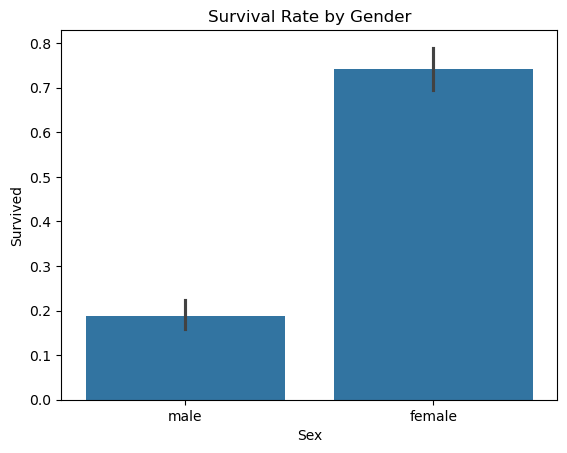

In [10]:
sns.barplot(x='Sex', y='Survived', data=train)
plt.title('Survival Rate by Gender')
plt.show()

Before visualizing data with Seaborn, must import the library using `import seaborn as sns`. This ensures that plotting functions like `sns.barplot()` are recognized by the Python interpreter. Forgetting this step leads to a `NameError`, which is a common but easily resolved issue in exploratory workflows.

# Compute survival rates by gender and class to uncover structural patterns.
# Use .groupby() with .mean() to calculate proportions, and .unstack() for interpretability.

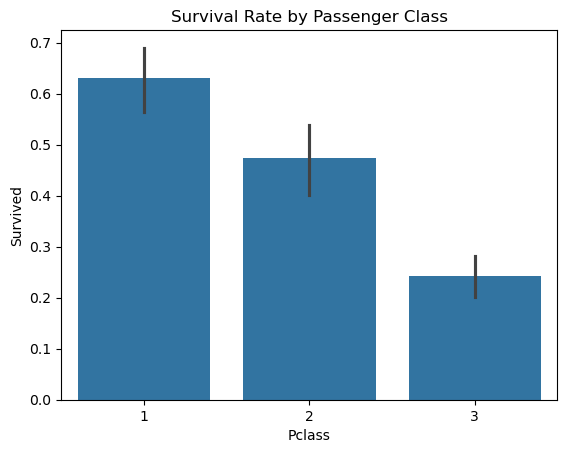

In [12]:
sns.barplot(x='Pclass', y='Survived', data=train)
plt.title('Survival Rate by Passenger Class')
plt.show()

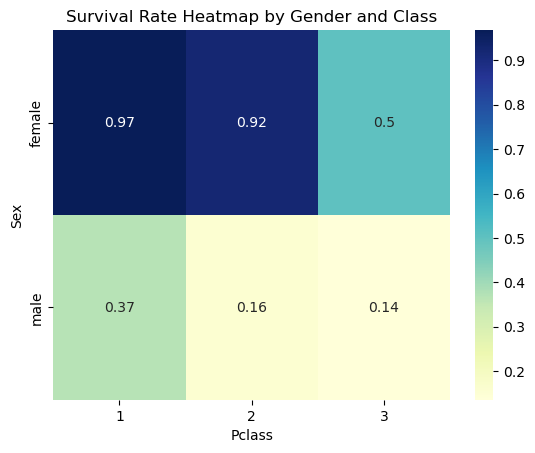

In [13]:
heatmap_data = train.pivot_table(index='Sex', columns='Pclass', values='Survived')
sns.heatmap(heatmap_data, annot=True, cmap='YlGnBu')
plt.title('Survival Rate Heatmap by Gender and Class')
plt.show()

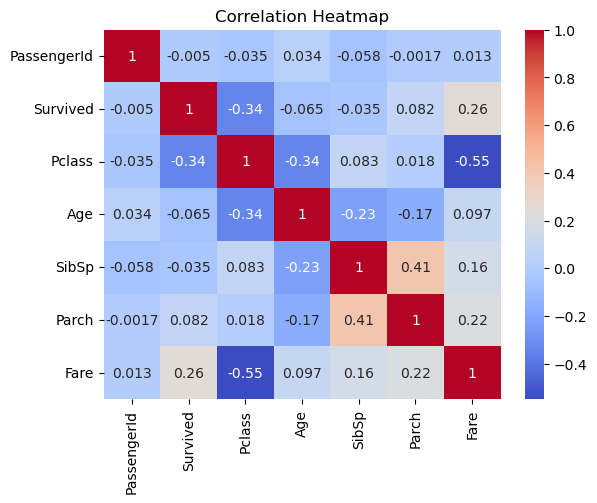

In [14]:
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()